In [125]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import flammkuchen as fl
import shutil

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

##  Load data

    master_path = original exp path
    out_path  = processed data path

In [127]:
master_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Raw_Data')

fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths

[WindowsPath('//portulab.synology.me/data/Kata/testdata/Raw_Data/240423_f0')]

In [128]:
fish= 0
fish_id =  fish_paths[fish].name
exp_name = Path(fish_paths[fish]).parts[-2]
exp_name = 'testfish'
fish_id, exp_name

('240423_f0', 'testfish')

In [129]:
save_circular = True
save_rectangular =False

In [130]:
out_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Processed_Data')

In [131]:
newpath = out_path / f'{fish_id}_processed'

if not newpath.exists():
    try:
        newpath.mkdir(parents=True)
    except PermissionError:
        print(f"Permission denied: can't create {newpath}")


### overview of all experiment motor behavior

In [132]:
m_x_lists = []
m_y_lists = []
fish_ids = []

for path in fish_paths:
    fish_ids.append(path.name)
    motor_path = list(path.glob('*motor_log.hdf5*'))[0]
    motor_log = pd.read_hdf(motor_path)
    m_x_lists.append(motor_log.x.values)
    m_y_lists.append(motor_log.y.values)

In [133]:
len(m_x_lists), len(fish_ids)

(1, 1)

# Plot all

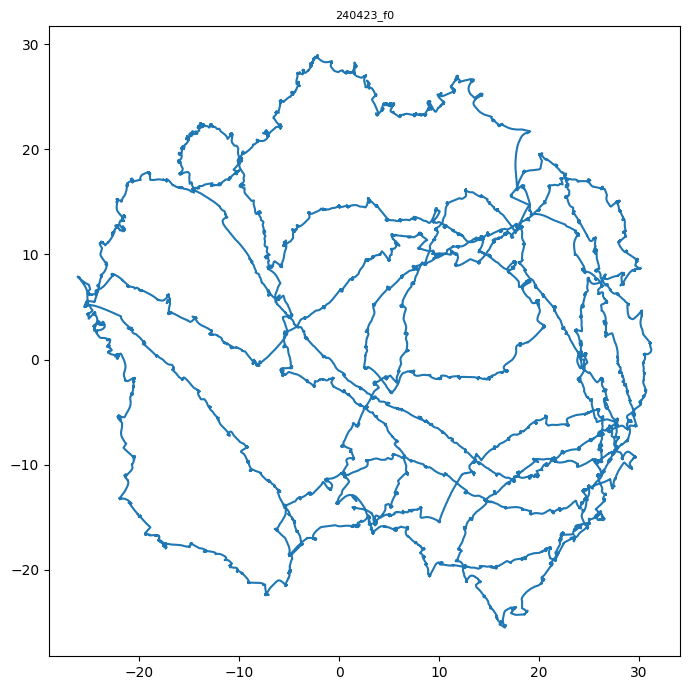

In [134]:
# Ensure all lists have the same length
assert len(fish_paths) == len(fish_ids) == len(m_x_lists) == len(m_y_lists)

n = len(fish_paths)
columns = math.ceil(math.sqrt(n))
rows = math.ceil(n / columns)

fig, axes = plt.subplots(rows, columns, figsize=(columns*7, rows*7), sharex=True, sharey=True)

if n == 1:
    axes = np.array([axes])

axes = axes.ravel()

for i in range(n):
    axes[i].set_title(fish_ids[i], fontsize=8)
    axes[i].plot(m_x_lists[i], m_y_lists[i])

# Hide remaining axes if n is not a perfect square
for j in range(n, rows*columns):
    axes[j].axis('off')

plt.tight_layout()

# Ensure the directory exists before trying to save the figure
out_dir = out_path/'plots'
out_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(out_dir / f'{exp_name}_trajectories.png')



## Make Circular mask

    margin: how much distance in mm you want from the borders
    center_x: centerpoint of arena x
    center_y:  centerpoint of arena y
    radius : radius of arena. Set here for our round arena of around 5-6 cm diameter

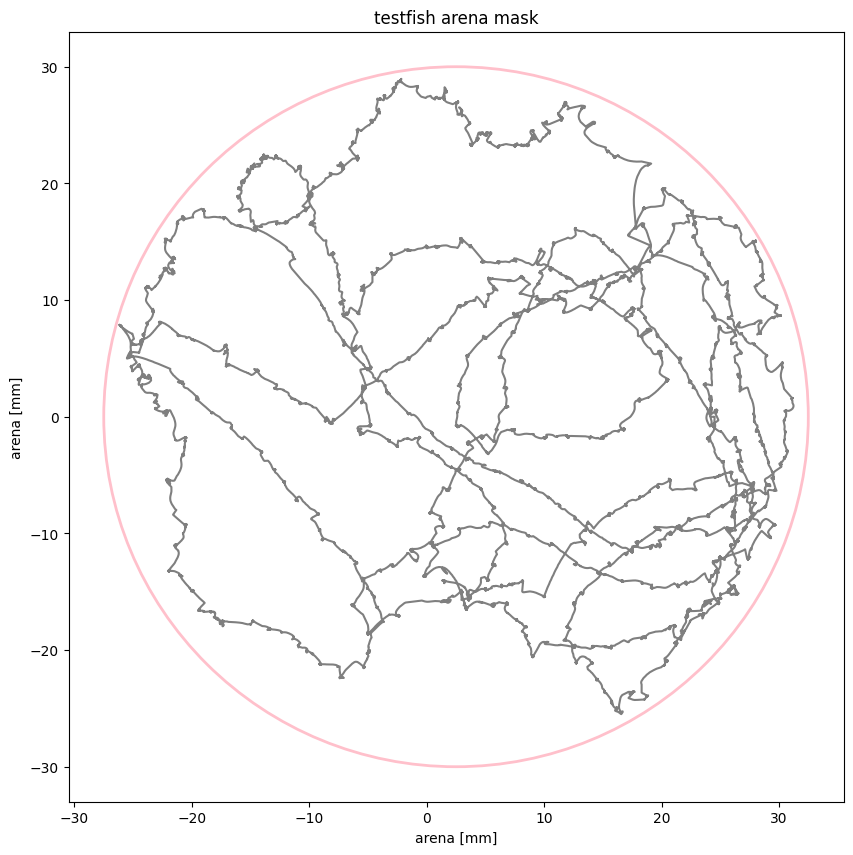

In [135]:
margin = 1
center_x = 2.5
center_y = 0
radius = 30

fig, ax = plt.subplots(figsize=(10,10))

for i in range(len(fish_paths)):
    plt.plot(m_x_lists[i], m_y_lists[i], c='k', alpha=0.5)

circle = plt.Circle((center_x, center_y), radius, color='pink', lw=2,fill=False)

ax.add_patch(circle)
plt.xlabel('arena [mm]')
plt.ylabel('arena [mm]')
plt.title('{} arena mask'.format(exp_name))

plt.savefig(out_path/'plots'/ '{}_mask.png'.format(exp_name))

### Print and save mask

In [136]:
mask = [center_x, center_y, radius, margin]
print (mask)

if save_circular:
    fl.save(out_path / '{}_mask.csv'.format(exp_name), mask)

[2.5, 0, 30, 1]


## Make rectangular mask

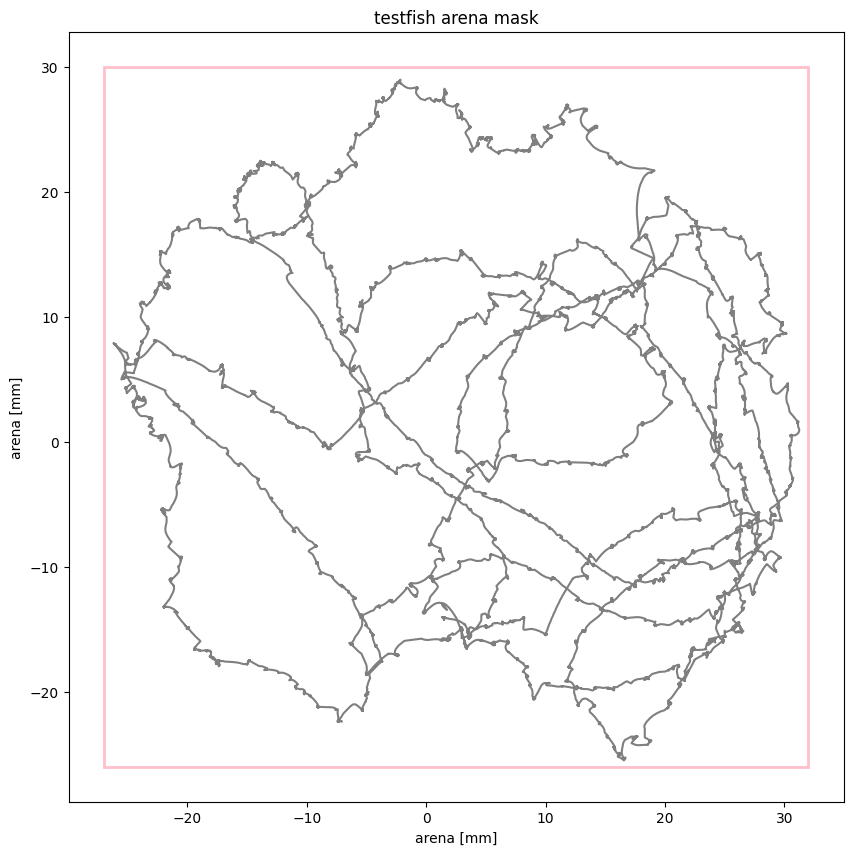

In [137]:
x_lim_neg = -27
x_lim_pos_edge = 59
x_lim_pos = x_lim_pos_edge + x_lim_neg
 
y_lim_neg = -26
y_lim_pos_edge = 56
y_lim_pos = y_lim_pos_edge + y_lim_neg
margin = 1

fig, ax = plt.subplots(figsize=(10,10))

for i in range(len(fish_paths)):
    plt.plot(m_x_lists[i], m_y_lists[i], c='k', alpha=0.5)

ax.add_patch(Rectangle((x_lim_neg, y_lim_neg), x_lim_pos_edge, y_lim_pos_edge, #x, y, widht, height
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=False,
#              angle=-0.5,
             lw=2))

plt.xlabel('arena [mm]')
plt.ylabel('arena [mm]')
plt.title('{} arena mask'.format(exp_name))

plt.savefig(out_path/'plots'/ '{}_rectangular_mask.png'.format(exp_name))

## Save mask

In [138]:
mask = [x_lim_neg, x_lim_pos, y_lim_neg, y_lim_pos, margin]
print (mask)

if save_rectangular:
    fl.save(out_path / '{}_mask.csv'.format(exp_name), mask)

[-27, 32, -26, 30, 1]
